In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
fifa_df = pd.read_csv("../data/fifa_19.csv")

<IPython.core.display.Javascript object>

In [4]:
fifa_df.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


<IPython.core.display.Javascript object>

In [5]:
fifa_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

<IPython.core.display.Javascript object>

## Lets look at just the best players

In [6]:
fifa_19_good_players = fifa_df[fifa_df.Overall > 80]

<IPython.core.display.Javascript object>

(array([ 192.,  998., 2363., 4727., 4289., 3570., 1513.,  445.,   96.,
          14.]),
 array([46. , 50.8, 55.6, 60.4, 65.2, 70. , 74.8, 79.6, 84.4, 89.2, 94. ]),
 <BarContainer object of 10 artists>)

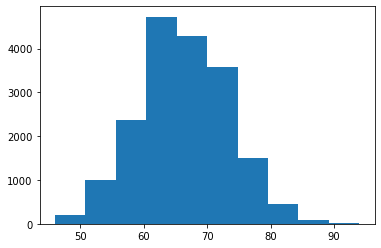

<IPython.core.display.Javascript object>

In [7]:
plt.hist(fifa_df["Overall"])

In [8]:
# fifa_19_good_players.shape

<IPython.core.display.Javascript object>

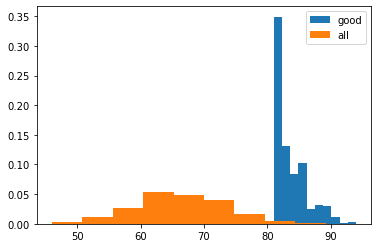

<IPython.core.display.Javascript object>

In [9]:
plt.hist(fifa_19_good_players["Overall"], density=True, label="good")
plt.hist(fifa_df["Overall"], density=True, label="all")
plt.legend()

## Do the proportion of players who are left footed change between those over 80 vs all ?

<AxesSubplot:ylabel='Preferred Foot'>

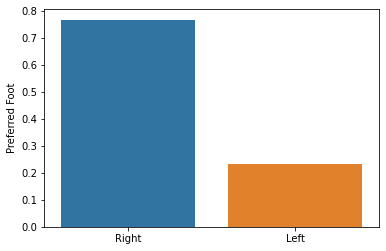

<IPython.core.display.Javascript object>

In [10]:
sns.barplot(
    x=["Right", "Left"],
    y=fifa_df["Preferred Foot"].value_counts()
    / fifa_df["Preferred Foot"].value_counts().sum(),
)

<AxesSubplot:ylabel='Preferred Foot'>

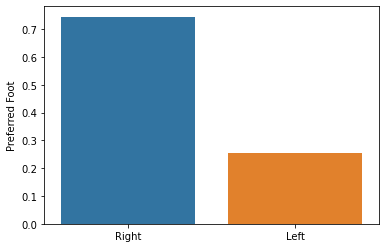

<IPython.core.display.Javascript object>

In [11]:
sns.barplot(x = ['Right', 'Left'], 
            y= fifa_19_good_players['Preferred Foot'].value_counts()/fifa_19_good_players['Preferred Foot'].value_counts().sum())




## Do the distribution of ages change between those over 80 vs all ?

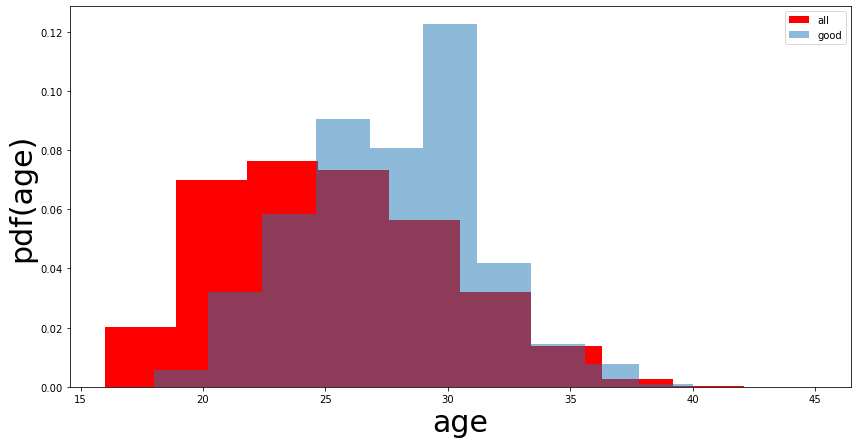

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(14, 7))
plt.hist(fifa_df.Age, color="r", label="all", density=True)

plt.hist(fifa_19_good_players.Age, label="good", density=True, alpha=0.5)

plt.ylabel("pdf(age)", fontsize=30)
plt.xlabel("age", fontsize=30)
plt.legend()

### Let's compare these by looking at the cdf 

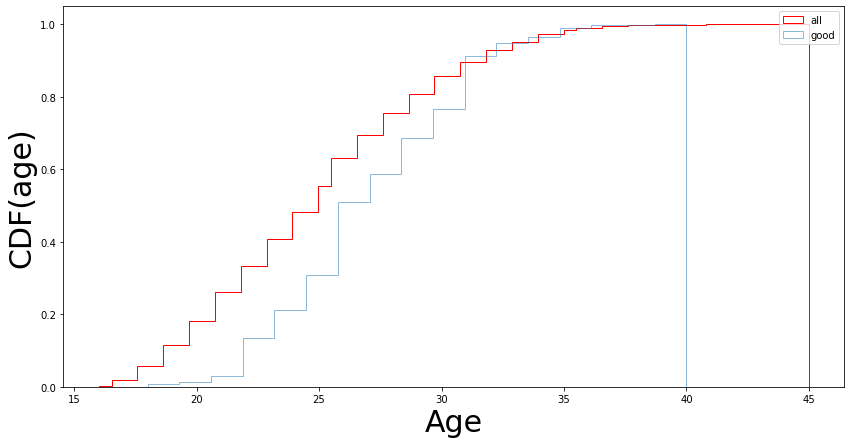

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(14, 7))
plt.hist(
    fifa_df.Age,
    color="r",
    label="all",
    density=True,
    cumulative=True,
    histtype="step",
    bins="auto",
)

plt.hist(
    fifa_19_good_players.Age,
    label="good",
    density=True,
    alpha=0.5,
    cumulative=True,
    histtype="step",
    bins="auto",
)

plt.xlabel("Age", fontsize=30)
plt.ylabel("CDF(age)", fontsize=30)
plt.legend()

# Let's now look at the potential growth of players

In [14]:
fifa_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

<IPython.core.display.Javascript object>

In [15]:
fifa_df.shape

(18207, 89)

<IPython.core.display.Javascript object>

In [16]:
fifa_df["potential_growth"] = fifa_df["Potential"] - fifa_df["Overall"]

<IPython.core.display.Javascript object>

In [17]:
fifa_df.shape

(18207, 90)

<IPython.core.display.Javascript object>

Text(0.5, 0, 'growth')

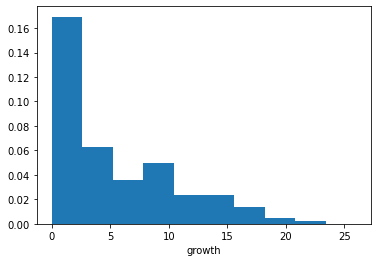

<IPython.core.display.Javascript object>

In [18]:
plt.hist(fifa_df["potential_growth"], density=True)
plt.xlabel("growth")

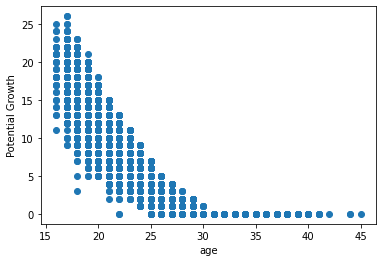

<IPython.core.display.Javascript object>

In [19]:
plt.scatter(x=fifa_df["Age"], y=fifa_df["potential_growth"])

plt.xlabel("age")
plt.ylabel("Potential Growth")
plt.show()

### If we only want to look at a certain group of players we can index them as below

In [20]:
fifa_19_strikers = fifa_df[fifa_df["Position"] == "ST"]

<IPython.core.display.Javascript object>

#  we will take a subset of the attributes which relate to the statistics

In [21]:
interesting_attributed_df = fifa_19_strikers[
    [
        "Age",
        "Crossing",
        "Finishing",
        "HeadingAccuracy",
        "ShortPassing",
        "Volleys",
        "Dribbling",
        "Curve",
        "FKAccuracy",
        "LongPassing",
        "BallControl",
        "Acceleration",
        "SprintSpeed",
        "Agility",
        "Reactions",
        "Balance",
        "ShotPower",
        "Jumping",
        "Stamina",
        "Strength",
        "potential_growth",
    ]
]

<IPython.core.display.Javascript object>

<AxesSubplot:>

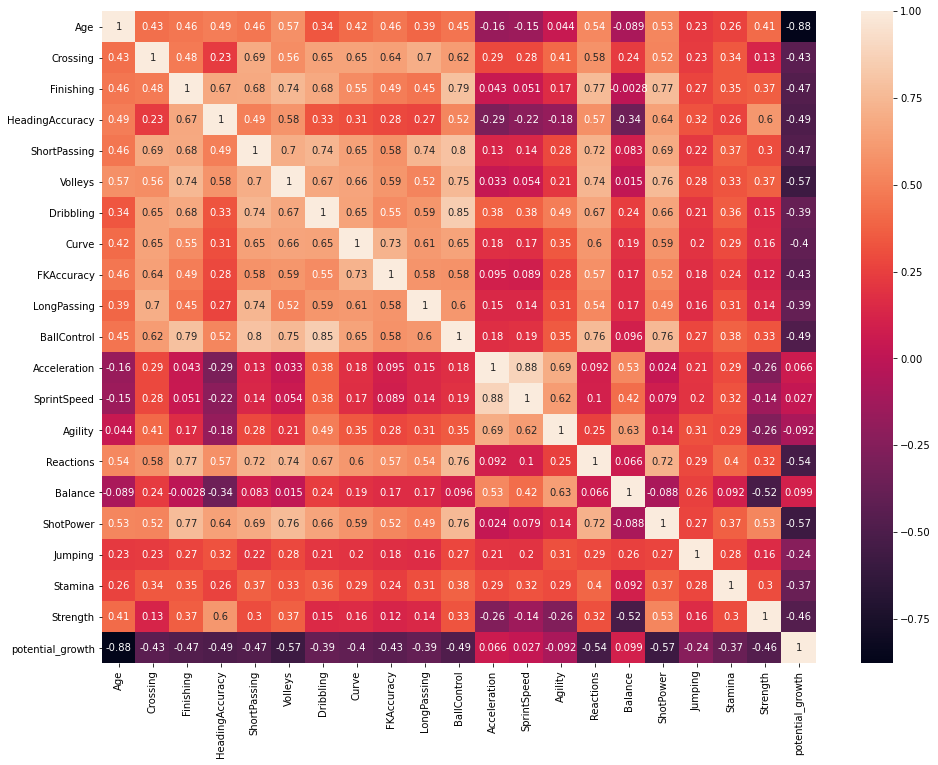

<IPython.core.display.Javascript object>

In [22]:
plt.figure(figsize=(16, 12))
sns.heatmap(interesting_attributed_df.corr(), annot=True)

### add some comments about confounders, explain why mostly negative correlation

## Let's now look at potential not just potential growth,

In [23]:
interesting_attributed_df = fifa_19_strikers[
    [
        "Age",
        "Overall",
        "Crossing",
        "Finishing",
        "HeadingAccuracy",
        "ShortPassing",
        "Volleys",
        "Dribbling",
        "Curve",
        "FKAccuracy",
        "LongPassing",
        "BallControl",
        "Acceleration",
        "SprintSpeed",
        "Agility",
        "Reactions",
        "Balance",
        "ShotPower",
        "Jumping",
        "Stamina",
        "Strength",
        "Potential",
    ]
]

<IPython.core.display.Javascript object>

<AxesSubplot:>

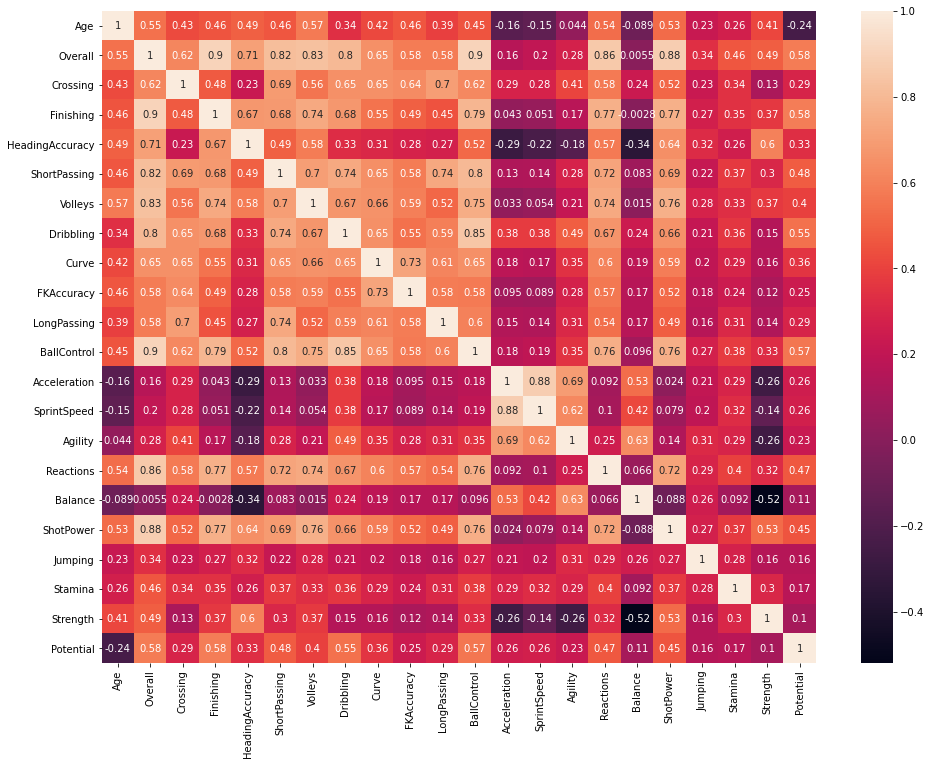

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(16, 12))
sns.heatmap(interesting_attributed_df.corr(), annot=True)

In [25]:
# simple_attributes_df = fifa_19_strikers[['Age','Overall', 'Potential']]
simple_attributes_df = interesting_attributed_df

<IPython.core.display.Javascript object>

In [26]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

In [27]:
y = simple_attributes_df["Potential"]
X = simple_attributes_df.drop("Potential", axis=1)

<IPython.core.display.Javascript object>

In [28]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8067431247117687

<IPython.core.display.Javascript object>

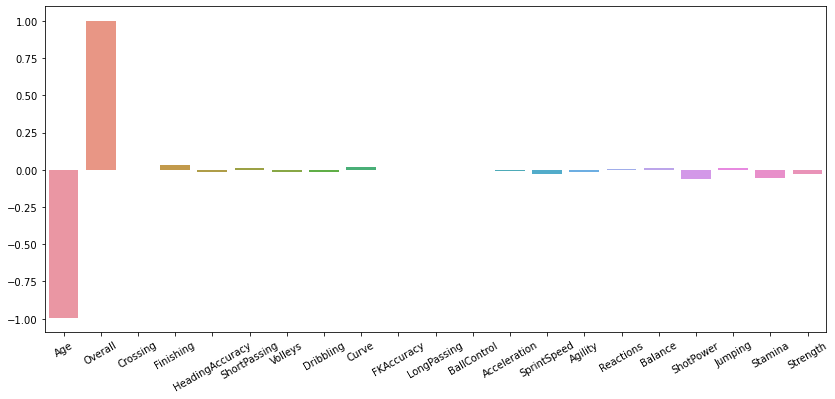

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(14, 6))
sns.barplot(x=X.columns, y=reg.coef_)
plt.xticks(rotation=30)
plt.show()

## Lets look at the nationalities, are there differences between countries

In [31]:
countries = ["England", "Wales", "Brazil", "Spain"]

<IPython.core.display.Javascript object>

In [33]:
overalls = {}
speeds = {}
strengths = {}

<IPython.core.display.Javascript object>

In [36]:
for country in countries:
    players_from_country = fifa_df[fifa_df.Nationality == country]
    overalls[country] = players_from_country.Overall
    speeds[country] = players_from_country.SprintSpeed
    strengths[country] = players_from_country.Strength

<IPython.core.display.Javascript object>

In [37]:
colors = sns.color_palette(palette="colorblind", n_colors=8)

<IPython.core.display.Javascript object>

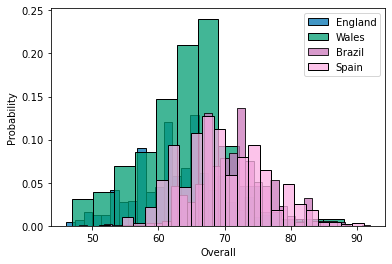

<IPython.core.display.Javascript object>

In [38]:
for i, country in enumerate(countries):
    sns.histplot(
        overalls[country], stat="probability", color=colors[2 * i], label=country
    )
plt.legend()

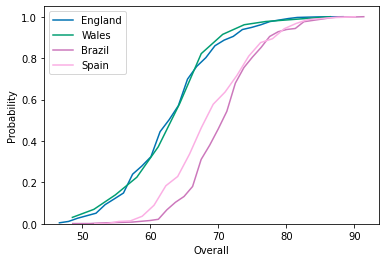

<IPython.core.display.Javascript object>

In [40]:
for i, country in enumerate(countries):
    sns.histplot(
        overalls[country],
        stat="probability",
        cumulative=True,
        element="poly",
        fill=False,
        color=colors[2 * i],
        label=country,
    )
plt.legend()

### Lets do this using only pandas (probably a better way)

In [120]:
restricted_country_df = fifa_df[
    (fifa_df.Nationality == "England")
    | (fifa_df.Nationality == "Wales")
    | (fifa_df.Nationality == "Brazil")
    | (fifa_df.Nationality == "Spain")
]

<IPython.core.display.Javascript object>

### Using just pandas the integration with seaborn is a bit easier

<AxesSubplot:xlabel='Nationality', ylabel='Overall'>

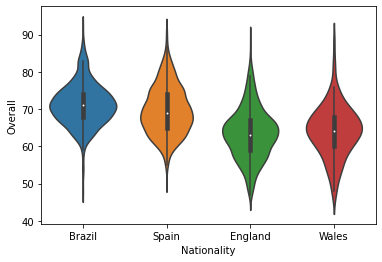

<IPython.core.display.Javascript object>

In [121]:
sns.violinplot(data=restricted_country_df, x="Nationality", y="Overall")

<AxesSubplot:xlabel='Nationality', ylabel='SprintSpeed'>

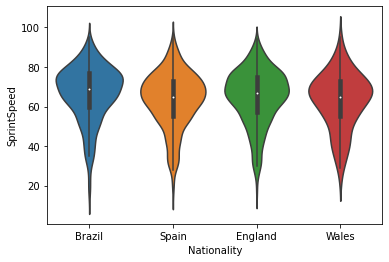

<IPython.core.display.Javascript object>

In [122]:
sns.violinplot(data=restricted_country_df, x="Nationality", y="SprintSpeed")

<AxesSubplot:xlabel='Nationality', ylabel='Strength'>

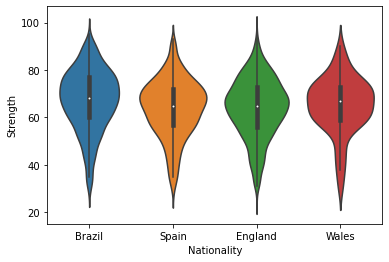

<IPython.core.display.Javascript object>

In [123]:
sns.violinplot(data=restricted_country_df, x="Nationality", y="Strength")

In [124]:
sns.violinplot(data=restricted_country_df, x="Nationality", y="Wage")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<IPython.core.display.Javascript object>

### Here the problem is wage has a unit, let's change this to be a number

In [ ]:
fifa_df.Wage

#### let's define a function that takes a string and removes the first (unit) and last (k) elements and then turns it into an integer

In [125]:
def format_wages(df):
    words = df["Wage"]
    if words[-1].lower() == "k":
        word = words[1:-1]
    else:
        word = words[1:]
    #     print(word)
    try:
        number = int(word)
    except:
        print(f" word is {word}")
        print(words)
        number = int(word)
    return number

<IPython.core.display.Javascript object>

### We can then apply this to the entire data frame

In [126]:
restricted_country_df["numeric_wage"] = restricted_country_df.apply(
    format_wages, axis=1
)

<ipython-input-126-babd8e2dff83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restricted_country_df["numeric_wage"] = restricted_country_df.apply(


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Nationality', ylabel='numeric_wage'>

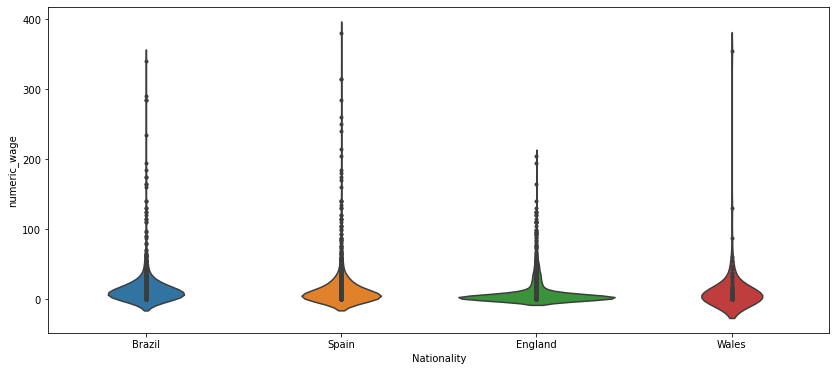

<IPython.core.display.Javascript object>

In [135]:
plt.figure(figsize=(14, 6))
sns.violinplot(
    data=restricted_country_df, x="Nationality", y="numeric_wage", inner="point"
)

### Note the outlier in Wales ... Gareth bale 